In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("diamonds.csv")

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [5]:
df.shape

(50000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [7]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Data Visulization

**pie chart**

In [9]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

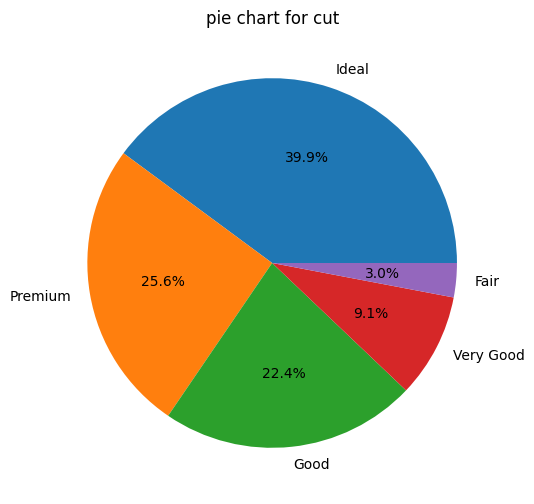

In [10]:
plt.figure(figsize=(6,6))
plt.pie(df['cut'].value_counts(),labels=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'],autopct='%1.1f%%')
plt.title("pie chart for cut")
plt.show()

**color**

In [11]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

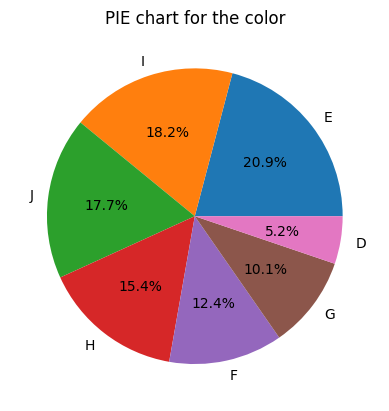

In [12]:
plt.pie(df['color'].value_counts(),labels=['E', 'I', 'J', 'H', 'F', 'G', 'D'],autopct='%1.1f%%')
plt.title("PIE chart for the color")
plt.show()

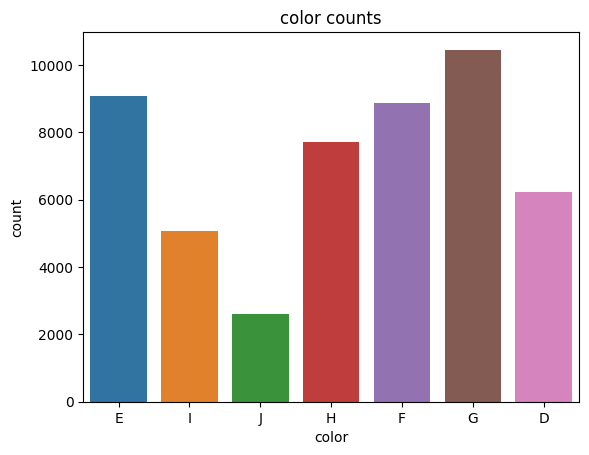

In [13]:
sns.countplot(data=df,x='color')
plt.title("color counts")
plt.show()

**cut countplot**

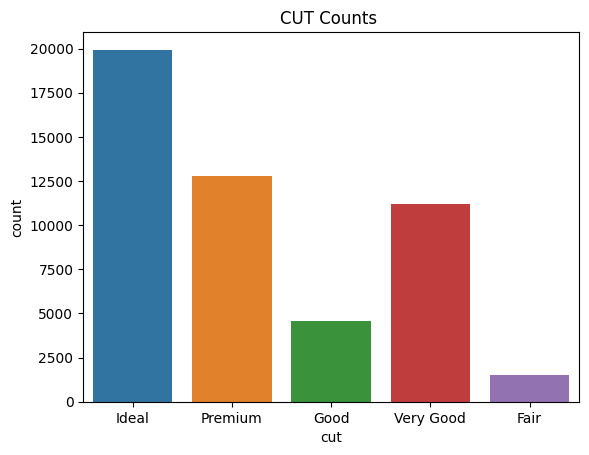

In [14]:
sns.countplot(data=df,x='cut')
plt.title("CUT Counts ")
plt.show()

**comparision between cut & Price**

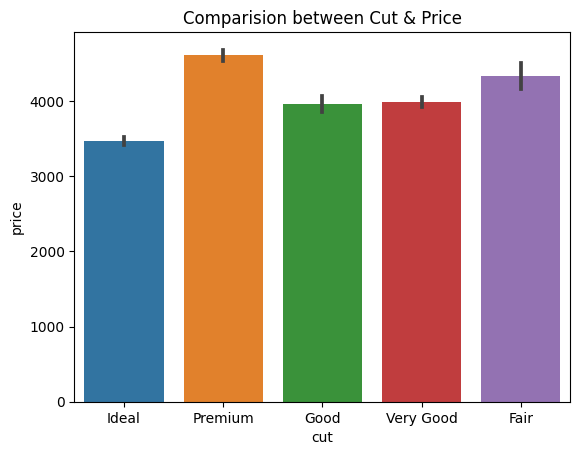

In [15]:
sns.barplot(x='cut',y='price',data=df)
plt.title("Comparision between Cut & Price")
plt.show()

**comparision between Color & Price**

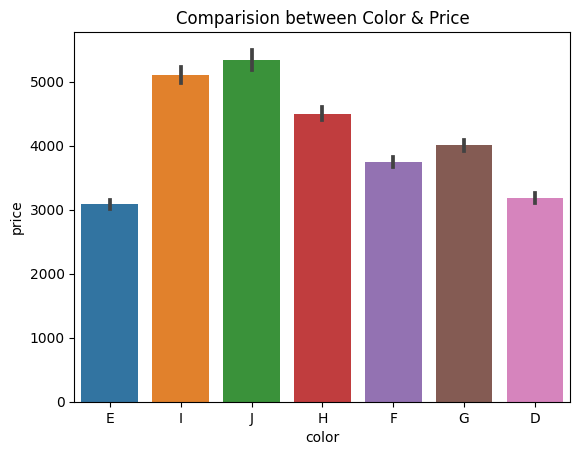

In [16]:
sns.barplot(x='color',y='price',data=df)
plt.title("Comparision between Color & Price")
plt.show()

**Comparision between clarity & Price**

In [17]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

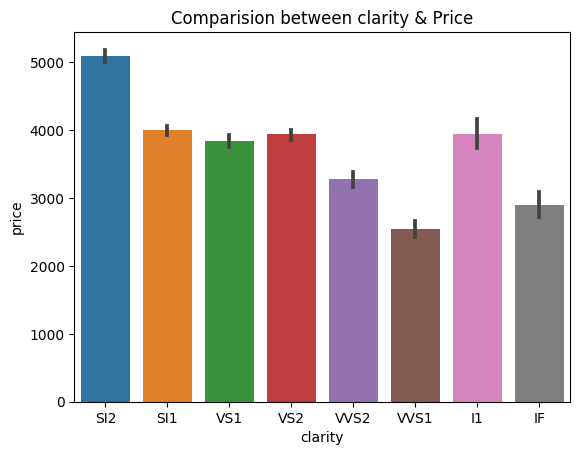

In [18]:
sns.barplot(x='clarity',y='price',data=df)
plt.title("Comparision between clarity & Price")
plt.show()

**Comparision between clarity & carat**

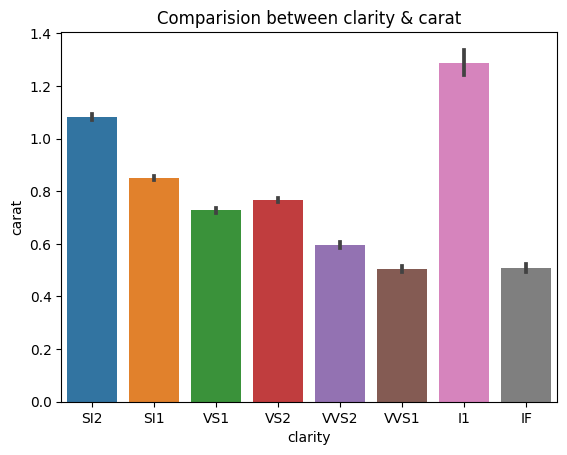

In [19]:
sns.barplot(x='clarity',y='carat',data=df)
plt.title("Comparision between clarity & carat")
plt.show()

**LabelEncoder**

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
e=['cut','color','clarity']

for i in e:
    le.fit(df[i].unique())
    df[i]=le.transform(df[i])
    print(i,df[i].unique())

cut [2 3 1 4 0]
color [1 5 6 4 2 3 0]
clarity [3 2 4 5 7 6 0 1]


In [23]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


**HEATMAP**

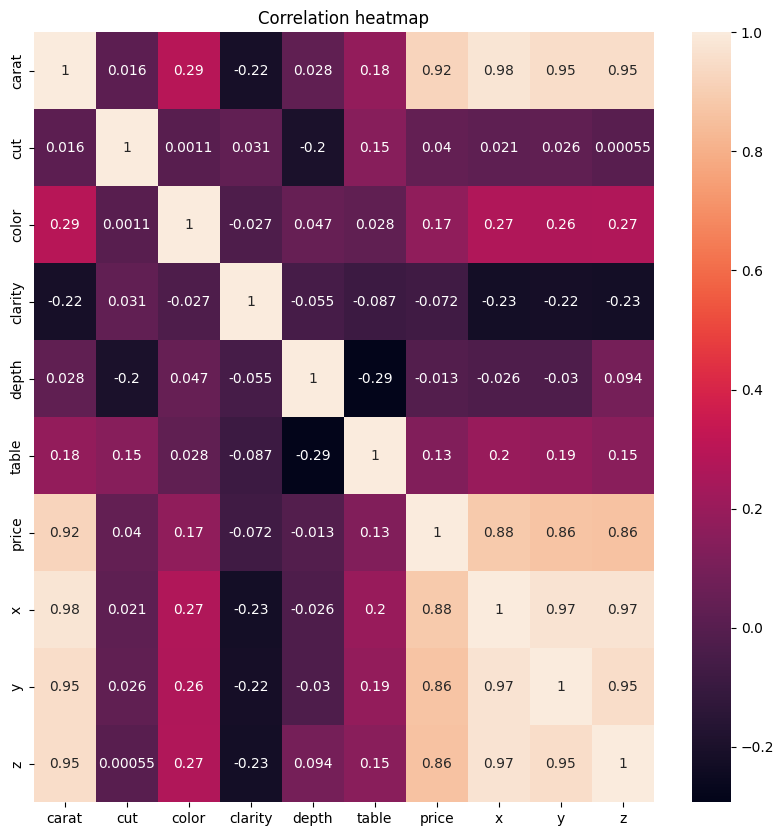

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation heatmap")
plt.show()

## Data Spliting

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x=df.drop(['price'],axis=1)

In [27]:
x

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
49995,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
49996,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
49997,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56
49998,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


In [28]:
y=df['price']

In [29]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
49995    2757
49996    2757
49997    2757
49998    2757
49999    2757
Name: price, Length: 50000, dtype: int64

In [30]:
type(y)

pandas.core.series.Series

In [31]:
y.to_frame()

,price
0,326
1,326
2,327
3,334
4,335
...,...
49995,2757
49996,2757
49997,2757
49998,2757


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
x_train

,carat,cut,color,clarity,depth,table,x,y,z
39087,0.50,1,3,2,63.6,55.0,5.06,5.03,3.21
30893,0.35,3,0,2,60.2,57.0,4.61,4.56,2.76
45278,1.01,0,1,0,64.5,54.0,6.31,6.22,4.03
16398,1.01,1,3,7,63.2,59.0,6.27,6.35,3.99
13653,1.23,2,4,3,60.6,57.0,6.98,6.94,4.22
...,...,...,...,...,...,...,...,...,...
11284,1.00,2,2,2,61.9,56.0,6.36,6.41,3.95
44732,0.52,2,3,7,61.6,54.0,5.17,5.22,3.20
38158,0.40,3,0,4,62.5,60.0,4.72,4.66,2.93
860,0.73,2,1,2,61.4,56.0,5.79,5.81,3.56


In [34]:
x_test

,carat,cut,color,clarity,depth,table,x,y,z
33553,0.61,1,3,0,61.2,57.2,5.44,5.49,3.34
9427,0.91,1,3,4,64.1,60.0,6.11,6.06,3.90
199,0.77,2,4,2,62.2,56.0,5.83,5.88,3.64
12447,1.13,4,5,5,60.7,58.0,6.72,6.75,4.09
39489,0.32,1,4,5,63.1,55.0,4.33,4.36,2.74
...,...,...,...,...,...,...,...,...,...
28567,0.30,2,0,4,60.8,58.0,4.31,4.34,2.63
25079,0.32,2,2,5,62.4,57.0,4.34,4.38,2.72
18707,1.41,3,4,5,61.2,60.0,7.17,7.21,4.40
15200,1.20,4,4,2,62.3,57.0,6.78,6.76,4.22


In [35]:
y_train

39087    1286
30893     827
45278    2036
16398    7137
13653    5951
         ... 
11284    5197
44732    1958
38158    1200
860      2886
15795    6810
Name: price, Length: 40000, dtype: int64

In [36]:
y_test

33553     931
9427     4744
199      2781
12447    5531
39489     505
         ... 
28567     742
25079     645
18707    8654
15200    6569
5857     4036
Name: price, Length: 10000, dtype: int64

## Model Selection

**Linear Regression**

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr=LinearRegression()

In [39]:
lr.fit(x_train,y_train)

LinearRegression()

In [40]:
lr.score(x_test,y_test)

0.887265896423879

**Random Forest**

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rf=RandomForestRegressor()

In [43]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [44]:
rf.score(x_test,y_test)

0.9816069136539544

**Decision Tree**

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
dt=DecisionTreeRegressor()

In [47]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [48]:
dt.score(x_test,y_test)

0.9646332863263298

## Accuracy comparision

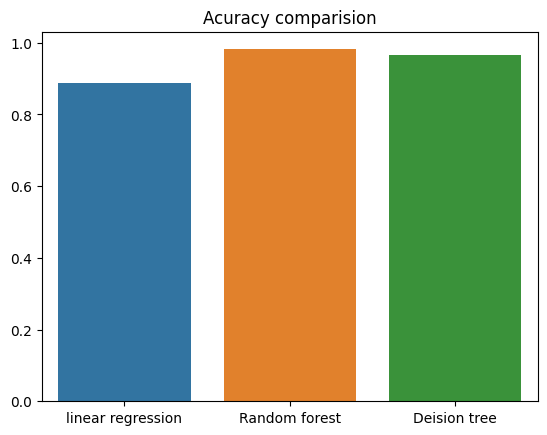

In [49]:
model=['linear regression','Random forest','Deision tree']
acc=[0.887265896423879,0.9817721674874942,0.965543948154867]
sns.barplot(x=model,y=acc)
plt.title("Acuracy comparision")
plt.show()